# HOUSING PRICE PREDICTION

### By Sneha Prasad

A real estate company has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc. Essentially, the organization intends to find the factors that influence housing pricing, such as area, number of rooms, bathrooms, and so on. To develop a linear model that quantitatively correlates property prices with characteristics such as room count, area, number of bathrooms, and so on. To determine the model's accuracy, or how well these factors predict property prices.

# Importing Libraries

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
import mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector
import mlxtend.feature_extraction
import joblib
import warnings
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV, KFold
warnings.filterwarnings('ignore')

# Loading Data

In [138]:
df=pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# Data Analysis

In [139]:
df.shape

(545, 13)

In [140]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [141]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [142]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [143]:
df_num=df.select_dtypes(np.number)
df_num.drop(['price'],axis=1,inplace=True)
df_cat=df.select_dtypes(object)

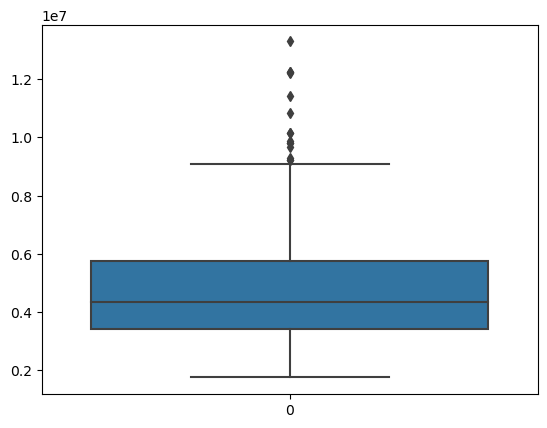

In [144]:
sns.boxplot(df.price)
plt.show()

In [145]:
# There are outliers in the target

In [146]:
df_num

,area,bedrooms,bathrooms,stories,parking
0,7420,4,2,3,2
1,8960,4,4,4,3
2,9960,3,2,2,2
3,7500,4,2,2,3
4,7420,4,1,2,2
...,...,...,...,...,...
540,3000,2,1,1,2
541,2400,3,1,1,0
542,3620,2,1,1,0
543,2910,3,1,1,0


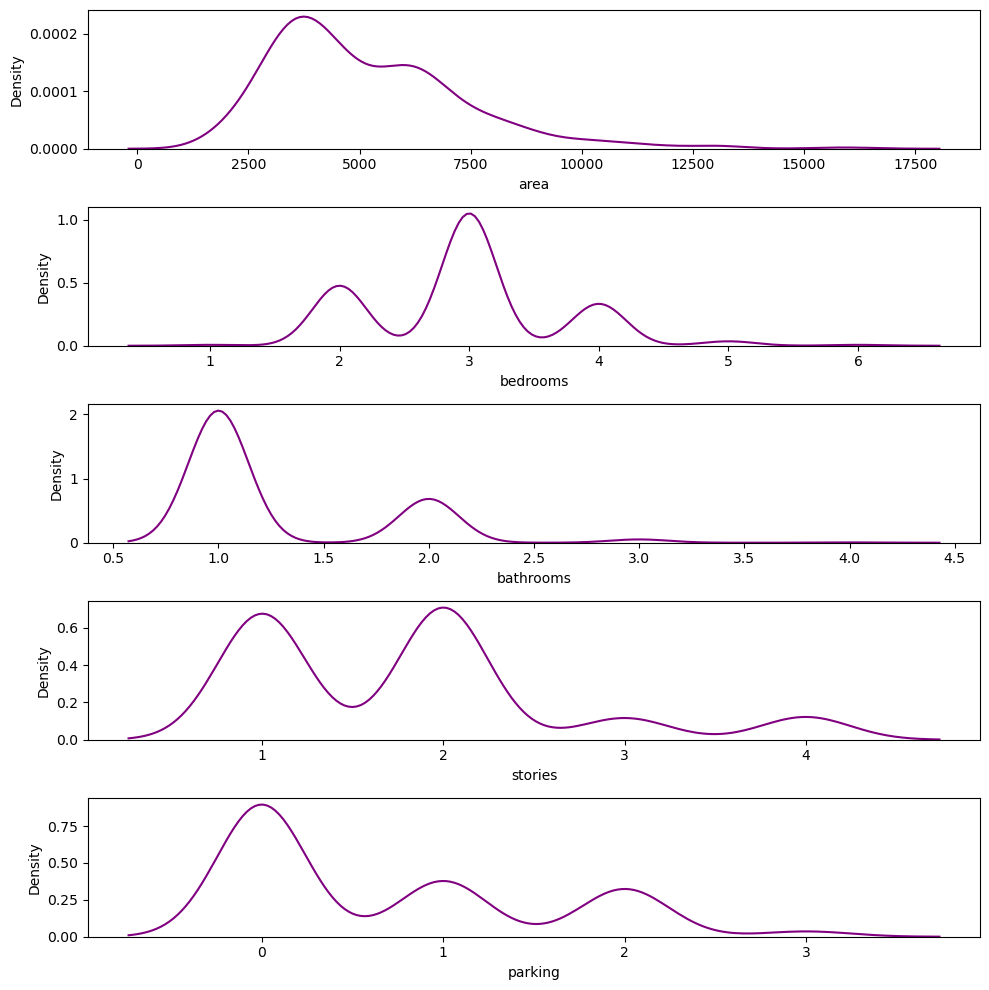

In [147]:
cols= df_num.columns

fig, ax= plt.subplots(5,1, figsize=(10,10))

for i, subplot in zip(cols, ax.flatten()):
    sns.kdeplot(x=df_num[i], ax=subplot, color='purple')

plt.tight_layout()
plt.show()

In [148]:
# The data available is not enough to do the predictions properly because the features are not normally distributed.

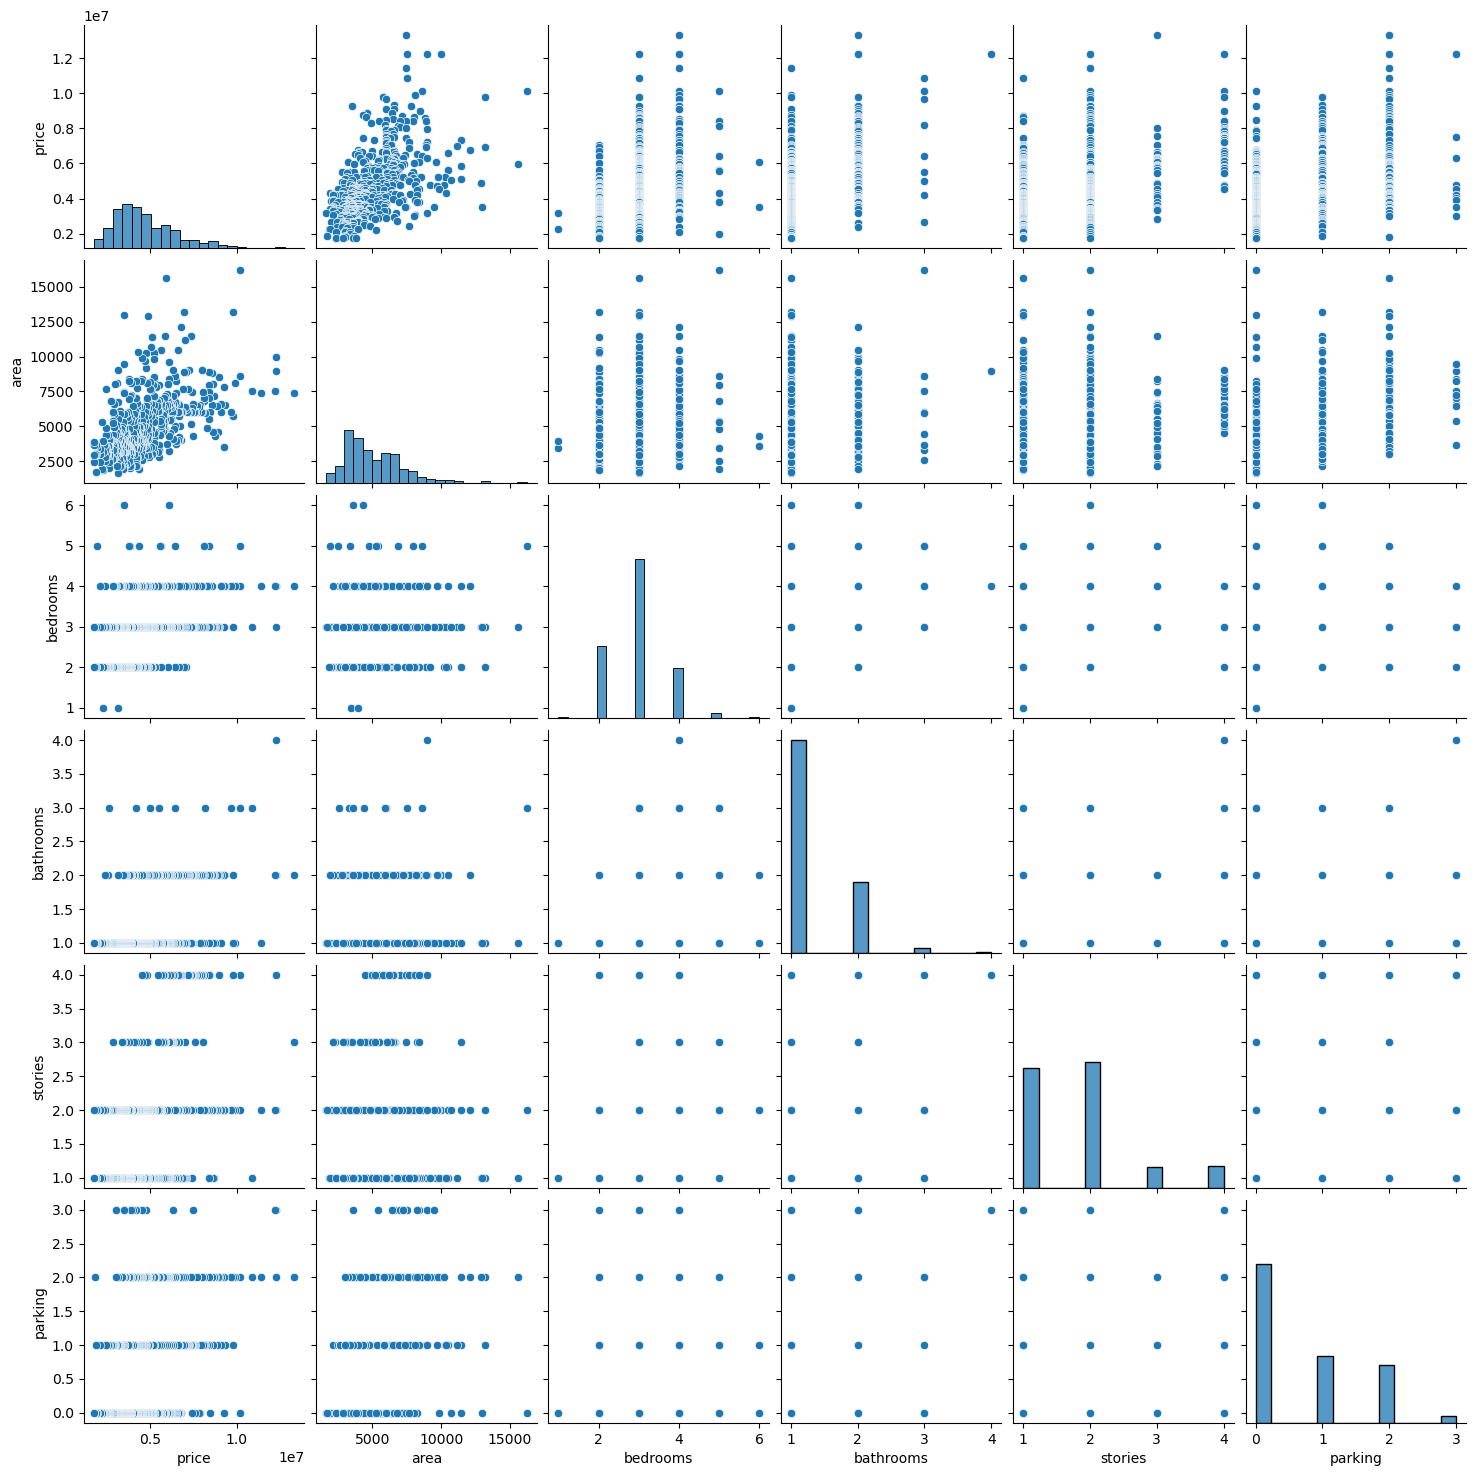

In [149]:
sns.pairplot(df)

<Axes: >

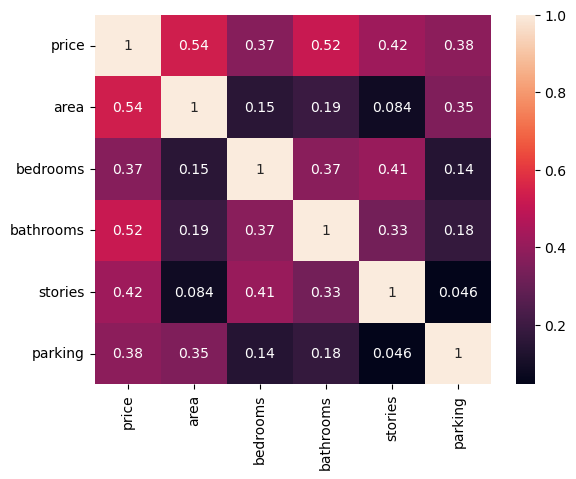

In [150]:
sns.heatmap(df.corr(),annot=True)

There is no much multicolinearity in the dataset.

In [151]:
df_num=df.select_dtypes(np.number)
df_num.drop(['price'],axis=1,inplace=True)
df_cat=df.select_dtypes(object)

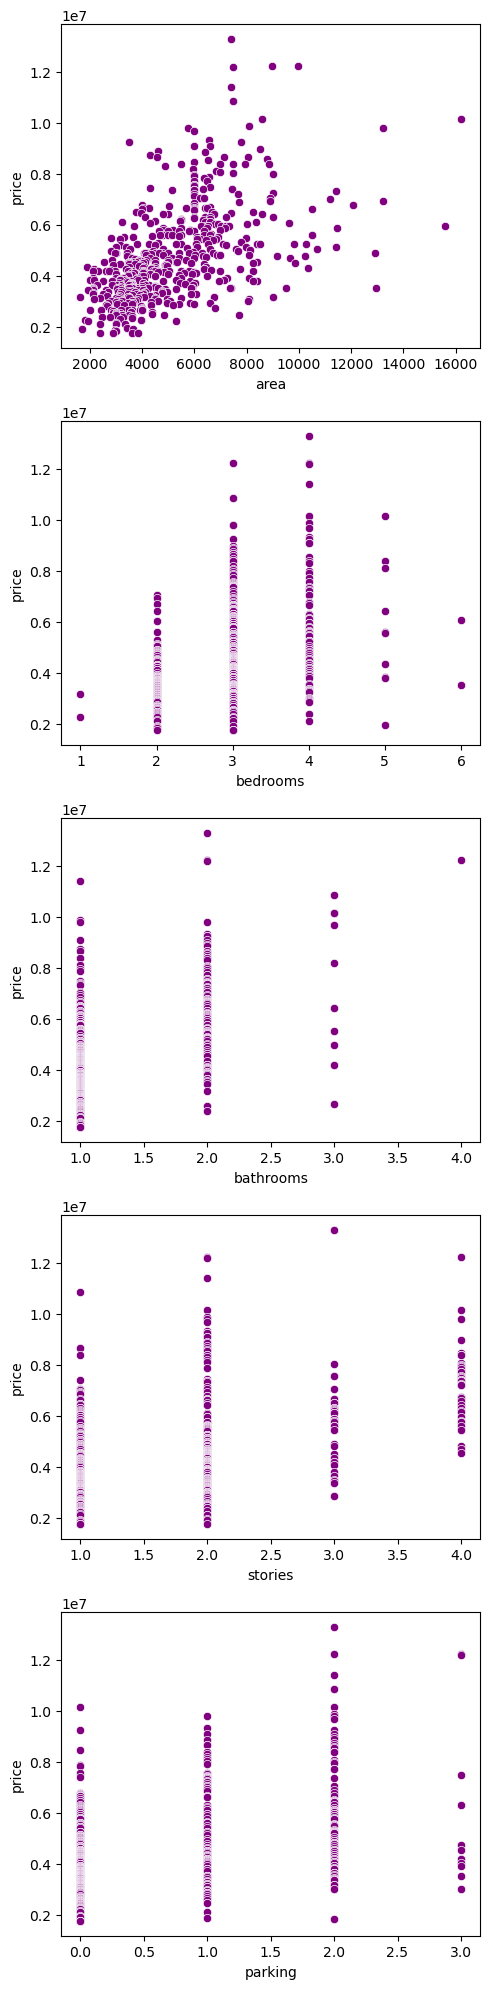

In [152]:
fig, ax= plt.subplots(5,1, figsize=(5,20))

for i, subplot in zip(cols, ax.flatten()):
    sns.scatterplot(x=df_num[i],y=df['price'], ax=subplot,color='purple')

plt.tight_layout()
plt.show()

In [153]:
#Area and price have positive correlation

# Preprocessing

In [154]:
df_num

,area,bedrooms,bathrooms,stories,parking
0,7420,4,2,3,2
1,8960,4,4,4,3
2,9960,3,2,2,2
3,7500,4,2,2,3
4,7420,4,1,2,2
...,...,...,...,...,...
540,3000,2,1,1,2
541,2400,3,1,1,0
542,3620,2,1,1,0
543,2910,3,1,1,0


In [155]:
sc=StandardScaler()
df_sc=pd.DataFrame(sc.fit_transform(df_num),
                    columns=df_num.columns)

In [156]:
df_cat.columns

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [157]:
df_dum=pd.get_dummies(df_cat,['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],drop_first=True)

In [158]:
df_dum.shape

(545, 8)

In [159]:
df1=pd.concat([df_sc,df_dum], axis=1)

In [160]:
final_df=pd.concat([df1, df.price], axis=1)

In [161]:
final_df

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,price
0,1.046726,1.403419,1.421812,1.378217,1.517692,1,0,0,0,1,1,0,0,13300000
1,1.757010,1.403419,5.405809,2.532024,2.679409,1,0,0,0,1,0,0,0,12250000
2,2.218232,0.047278,1.421812,0.224410,1.517692,1,0,1,0,0,1,1,0,12250000
3,1.083624,1.403419,1.421812,0.224410,2.679409,1,0,1,0,1,1,0,0,12215000
4,1.046726,1.403419,-0.570187,0.224410,1.517692,1,1,1,0,1,0,0,0,11410000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,-0.991879,-1.308863,-0.570187,-0.929397,1.517692,1,0,1,0,0,0,0,1,1820000
541,-1.268613,0.047278,-0.570187,-0.929397,-0.805741,0,0,0,0,0,0,1,0,1767150
542,-0.705921,-1.308863,-0.570187,-0.929397,-0.805741,1,0,0,0,0,0,0,1,1750000
543,-1.033389,0.047278,-0.570187,-0.929397,-0.805741,0,0,0,0,0,0,0,0,1750000


# Model Building

In [162]:
X=final_df.drop(['price'],axis=1)
y=final_df.price

In [163]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

Building Base model

In [164]:
lr=LinearRegression()
base_model=lr.fit(X_train,y_train)

In [165]:
pred_train=base_model.predict(X_train)
pred_test=base_model.predict(X_test)

r2_train=r2_score(y_train,pred_train)
r2_test=r2_score(y_test,pred_test)

r2_train,r2_test

(0.6592098113187075, 0.7245629970975958)

In [166]:
rmse_train=np.sqrt(mean_squared_error(y_train,pred_train))
rmse_test=np.sqrt(mean_squared_error(y_test,pred_test))

rmse_train,rmse_test

(1092476.579156136, 977460.414595522)

DecisionTreeRegressor Model

In [167]:
vif_df= pd.DataFrame()
vif_df["features"]=list(X.columns)
vif_df["VIF"]=[VIF(X.values,i) for i in range(X.shape[1])]
vif_df.sort_values(by="VIF", ascending=False)

,features,VIF
5,mainroad_yes,3.727078
11,furnishingstatus_semi-furnished,2.031244
7,basement_yes,1.995314
12,furnishingstatus_unfurnished,1.784739
9,airconditioning_yes,1.663988
10,prefarea_yes,1.500173
6,guestroom_yes,1.473259
3,stories,1.465830
1,bedrooms,1.363943
0,area,1.286408


In [168]:
# All the features are significant

In [169]:
lr=LinearRegression()
sfs_forward=SequentialFeatureSelector(estimator=lr,
                                     k_features='best',
                                     forward=True,
                                     scoring='neg_root_mean_squared_error')

In [170]:
sfs_forward.fit(X,y)
sfs_forward.k_feature_names_

('area',
 'bathrooms',
 'stories',
 'mainroad_yes',
 'guestroom_yes',
 'airconditioning_yes',
 'prefarea_yes',
 'furnishingstatus_unfurnished')

In [171]:
X=final_df[['area','bathrooms','stories','mainroad_yes','guestroom_yes','airconditioning_yes','prefarea_yes','furnishingstatus_unfurnished']]
y=final_df.price

In [172]:
final_df

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,price
0,1.046726,1.403419,1.421812,1.378217,1.517692,1,0,0,0,1,1,0,0,13300000
1,1.757010,1.403419,5.405809,2.532024,2.679409,1,0,0,0,1,0,0,0,12250000
2,2.218232,0.047278,1.421812,0.224410,1.517692,1,0,1,0,0,1,1,0,12250000
3,1.083624,1.403419,1.421812,0.224410,2.679409,1,0,1,0,1,1,0,0,12215000
4,1.046726,1.403419,-0.570187,0.224410,1.517692,1,1,1,0,1,0,0,0,11410000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,-0.991879,-1.308863,-0.570187,-0.929397,1.517692,1,0,1,0,0,0,0,1,1820000
541,-1.268613,0.047278,-0.570187,-0.929397,-0.805741,0,0,0,0,0,0,1,0,1767150
542,-0.705921,-1.308863,-0.570187,-0.929397,-0.805741,1,0,0,0,0,0,0,1,1750000
543,-1.033389,0.047278,-0.570187,-0.929397,-0.805741,0,0,0,0,0,0,0,0,1750000


In [173]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [202]:
lr=LinearRegression()
model_lr=lr.fit(X_train,y_train)

In [203]:
pred_train_lr=model_lr.predict(X_train)
pred_test_lr=model_lr.predict(X_test)

r2_train=r2_score(y_train,pred_train_lr)
r2_test=r2_score(y_test,pred_test_lr)

r2_train,r2_test

(0.6178457017348806, 0.7146328858138734)

In [204]:
y_pred=model_lr.predict(X_test)

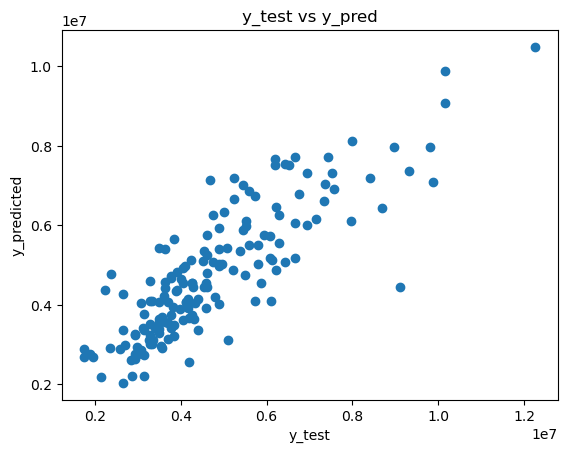

In [210]:
plt.scatter(x=y_test,y=y_pred)
plt.title('y_test vs y_pred')
plt.xlabel('y_test')
plt.ylabel('y_predicted')
plt.show()

# Conclusion

Using Linear Regression model a house price prediction model has been built with 71% accuracy.